In [5]:
# obtain a default Argument object that will be used to call the compiler
import approx_gradient
import default_setting
args = approx_gradient.get_args([])
approx_gradient.frame_idx = 0

In [6]:
import os
# chooses from 'hl', 'tf', 'torch'
backend = 'hl'
dest_dir = os.path.abspath('../siggraph')
default_setting.set_argument(args, dest_dir, 'siggraph', backend)

In [7]:
approx_gradient.main(args)

loaded compiler_problem from /n/fs/scratch/yutingy/Adelta_demo/siggraph
Optimizing 3 random restarts
*********************************************
0 global -1 0.0006234061
*********************************************
1 global 0 0.00066407997
*********************************************
2 global -1 0.00068774744
Generating GLSL code...
Done


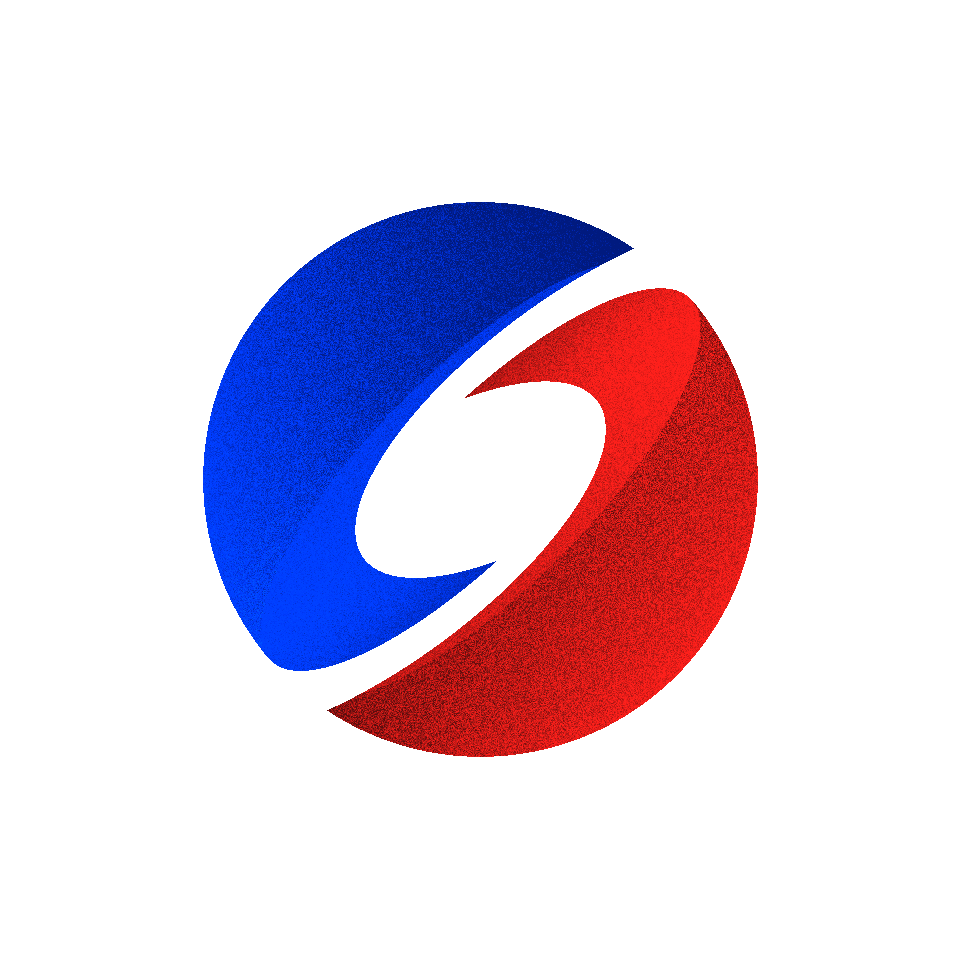

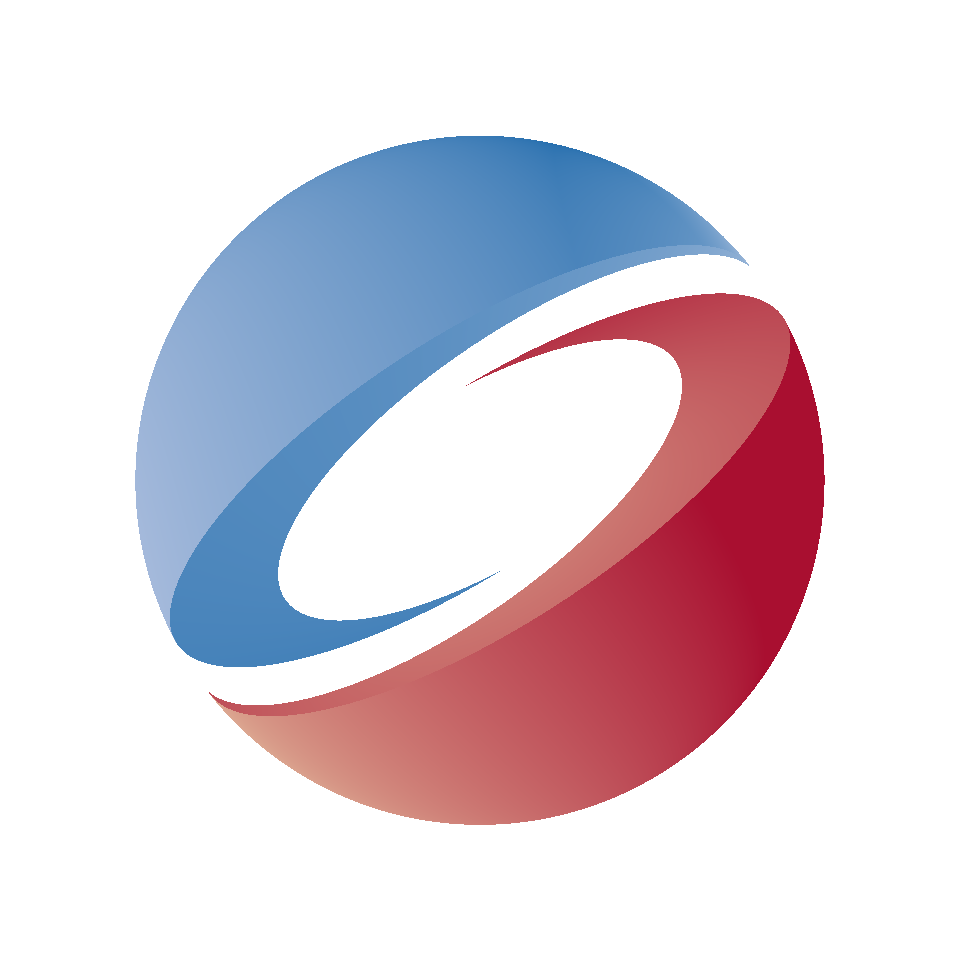

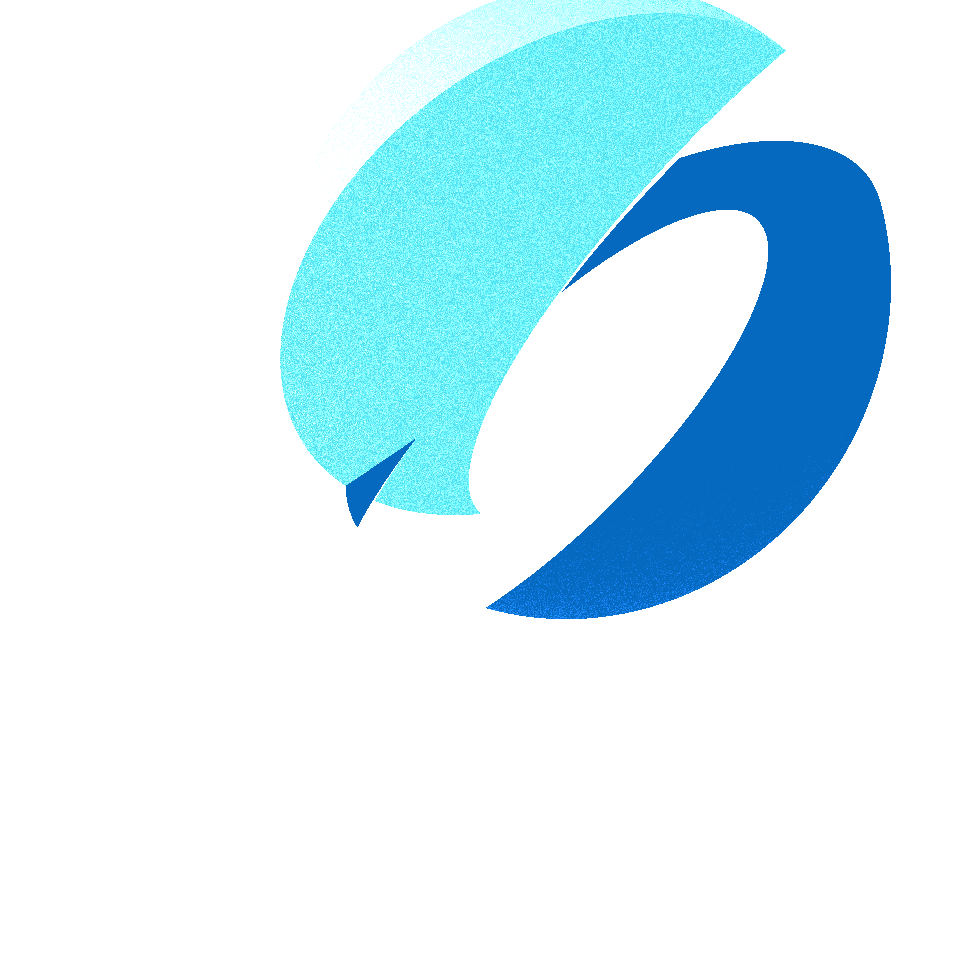

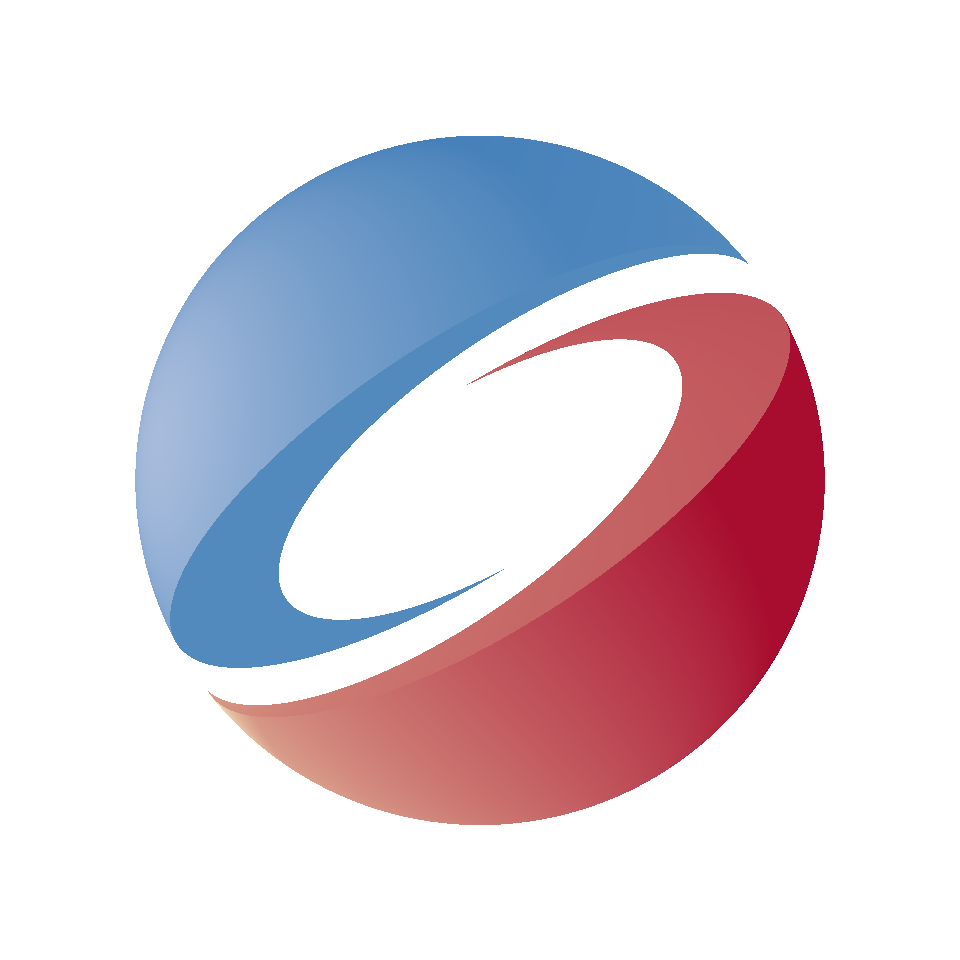

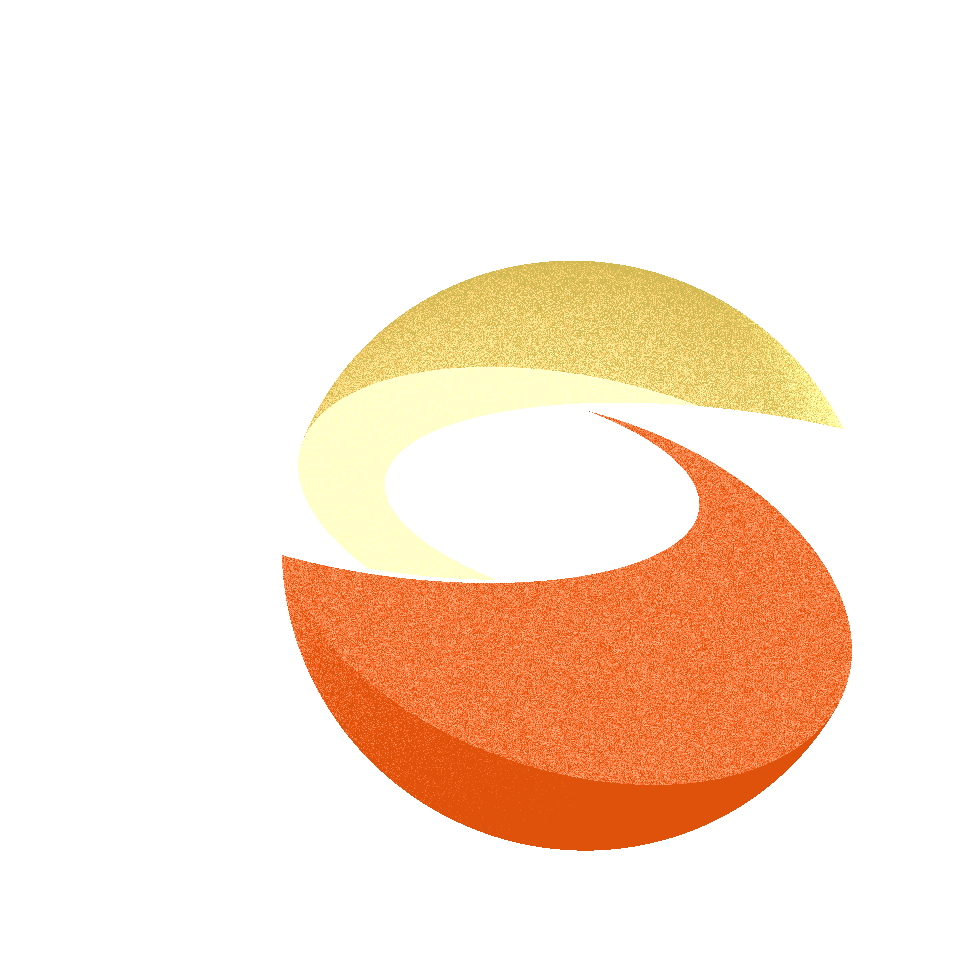

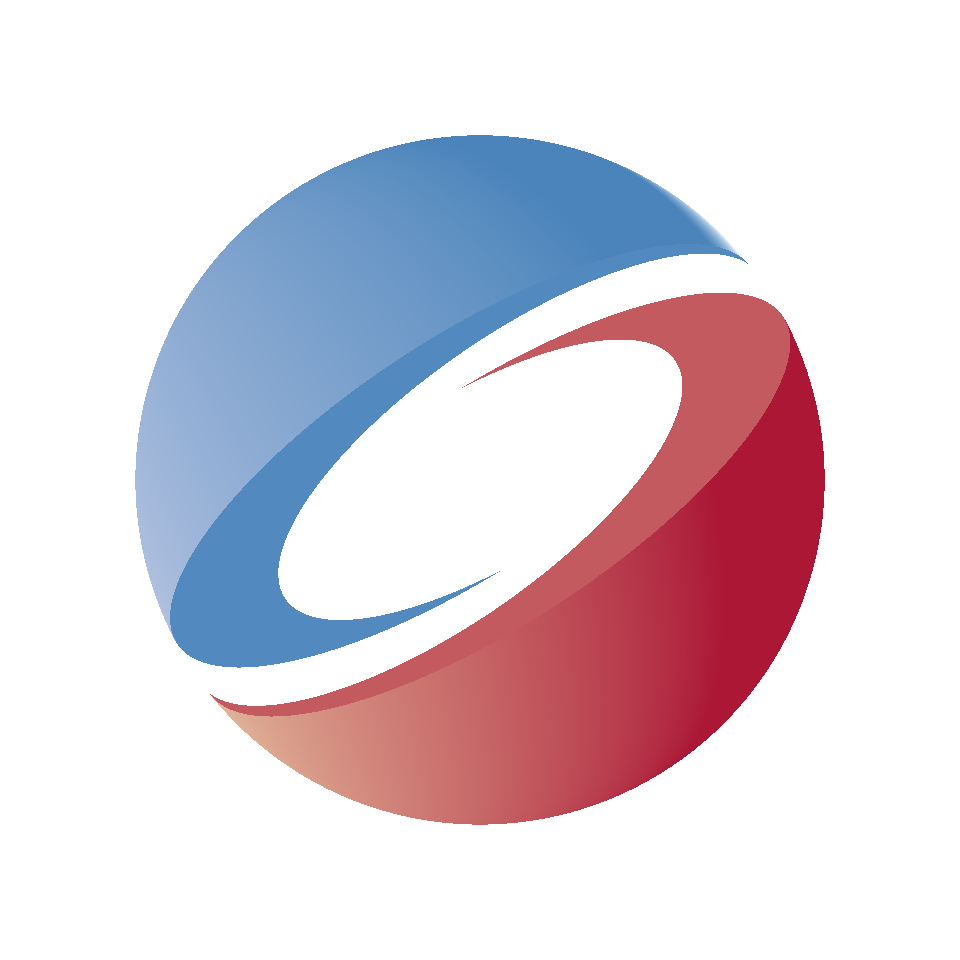

In [8]:
import os
from IPython.display import Image, display

listOfImageNames = []

for i in range(3):
    listOfImageNames.append(os.path.join(args.dir, 'init%d.png' % i))
    listOfImageNames.append(os.path.join(args.dir, 'ours_%s_%s_%.1e_result%d_0.png' % (args.metrics,
                                                                                       args.optimizer,
                                                                                       args.learning_rate,
                                                                                       i)))

for imageName in listOfImageNames:
    display(Image(filename=imageName, width=300))